In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import warnings
import logging

warnings.filterwarnings("ignore")

# Настройка стиля графиков
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams["figure.dpi"] = 100

# Настройка логирования
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")

In [7]:
def load_china_aha_data():
    """
    Загружает данные AHA кодов из china_12_lead датасета
    """
    print("📂 Загрузка данных AHA кодов из china_12_lead...")

    try:
        current_dir = Path.cwd()
        project_root = None

        for parent in [current_dir] + list(current_dir.parents):
            if (parent / "data").exists() and (parent / "plots").exists():
                project_root = parent
                break

        if project_root is None:
            project_root = current_dir

        # Путь к файлу с AHA кодами из china_12_lead
        china_path = (
            project_root
            / "analysis_results"
            / "china_12_lead"
            / "all_aha_codes_combined_full.csv"
        )

        if not china_path.exists():
            print(f"⚠ Файл не найден: {china_path}")
            china_dir = project_root / "analysis_results" / "china_12_lead"
            if china_dir.exists():
                aha_files = list(china_dir.glob("*aha*.csv"))
                if aha_files:
                    china_path = aha_files[0]
                    print(f"  Найден альтернативный файл: {china_path.name}")
                else:
                    print(f"❌ В директории {china_dir} нет файлов с AHA кодами")
                    return None
            else:
                print(f"❌ Директория не найдена: {china_dir}")
                return None

        # Загружаем данные
        china_df = pd.read_csv(china_path)
        print(f"  ✓ Загружено {len(china_df)} записей из china_12_lead")

        # Переименовываем колонки для единообразия
        china_df = china_df.rename(
            columns={
                "AHA_Code": "aha_code",
                "Total_Count": "count",
                "Percentage": "percentage",
                "Cumulative_Percentage": "cumulative_percentage",
            }
        )

        # Конвертируем AHA код в строку и очищаем
        china_df["aha_code"] = china_df["aha_code"].astype(str).str.strip()

        # Оставляем только нужные колонки
        required_cols = ["aha_code", "count", "percentage", "cumulative_percentage"]
        china_df = china_df[required_cols]

        # Добавляем информацию о датасете
        china_df["dataset"] = "china_12_lead"

        return china_df

    except Exception as e:
        print(f"❌ Ошибка при загрузке данных china_12_lead: {e}")
        import traceback

        traceback.print_exc()
        return None


def load_ptbxl_aha_data():
    """
    Загружает данные AHA кодов из ptb_xl датасета
    """
    print("📂 Загрузка данных AHA кодов из ptb_xl...")

    try:
        current_dir = Path.cwd()
        project_root = None

        for parent in [current_dir] + list(current_dir.parents):
            if (parent / "data").exists() and (parent / "plots").exists():
                project_root = parent
                break

        if project_root is None:
            project_root = current_dir

        # Путь к файлу с AHA кодами из ptb_xl
        ptb_path = (
            project_root
            / "analysis_results"
            / "ptb_xl"
            / "aha_codes_detailed_statistics.csv"
        )

        if not ptb_path.exists():
            print(f"⚠ Файл не найден: {ptb_path}")
            ptb_dir = project_root / "analysis_results" / "ptb_xl"
            if ptb_dir.exists():
                aha_files = list(ptb_dir.glob("*aha*.csv"))
                if aha_files:
                    ptb_path = aha_files[0]
                    print(f"  Найден альтернативный файл: {ptb_path.name}")
                else:
                    print(f"❌ В директории {ptb_dir} нет файлов с AHA кодами")
                    return None
            else:
                print(f"❌ Директория не найдена: {ptb_dir}")
                return None

        # Загружаем данные
        ptb_df = pd.read_csv(ptb_path)
        print(f"  ✓ Загружено {len(ptb_df)} записей из ptb_xl")

        # Конвертируем AHA код в строку и очищаем
        ptb_df["aha_code"] = ptb_df["aha_code"].astype(str).str.strip()
        # Удаляем .0 для целых чисел
        ptb_df["aha_code"] = ptb_df["aha_code"].apply(
            lambda x: x.rstrip(".0") if x.endswith(".0") else x
        )

        # Добавляем информацию о датасете
        ptb_df["dataset"] = "ptb_xl"

        return ptb_df

    except Exception as e:
        print(f"❌ Ошибка при загрузке данных ptb_xl: {e}")
        import traceback

        traceback.print_exc()
        return None


def compare_aha_codes_simple(china_df, ptb_df):
    """
    Простое сравнение AHA кодов из двух датасетов
    """
    print("\n" + "=" * 80)
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ AHA КОДОВ")
    print("=" * 80)

    if china_df is None or ptb_df is None:
        print("❌ Не удалось загрузить данные для сравнения")
        return None, None, None

    # Базовая статистика
    print("\n📊 БАЗОВАЯ СТАТИСТИКА:")
    print("-" * 60)
    print("china_12_lead:")
    print(f"  • Уникальных AHA кодов: {len(china_df)}")
    print(f"  • Всего присвоений кодов: {china_df['count'].sum():,}")
    print(f"  • Среднее присвоений на код: {china_df['count'].mean():.1f}")

    print("\nptb_xl:")
    print(f"  • Уникальных AHA кодов: {len(ptb_df)}")
    print(f"  • Всего присвоений кодов: {ptb_df['count'].sum():,}")
    print(f"  • Среднее присвоений на код: {ptb_df['count'].mean():.1f}")

    # Анализ пересечений
    china_codes = set(china_df["aha_code"])
    ptb_codes = set(ptb_df["aha_code"])

    intersection = china_codes.intersection(ptb_codes)
    china_only = china_codes - ptb_codes
    ptb_only = ptb_codes - china_codes

    print("\n🔍 АНАЛИЗ ПЕРЕСЕЧЕНИЙ:")
    print("-" * 60)
    print(f"  • Общих кодов: {len(intersection)}")
    print(f"  • Только в china_12_lead: {len(china_only)}")
    print(f"  • Только в ptb_xl: {len(ptb_only)}")

    # Создаем DataFrame с объединенными данными для всех общих кодов
    intersection_data = []
    for code in sorted(intersection):
        china_row = china_df[china_df["aha_code"] == code]
        ptb_row = ptb_df[ptb_df["aha_code"] == code]

        china_count = china_row["count"].values[0] if not china_row.empty else 0
        ptb_count = ptb_row["count"].values[0] if not ptb_row.empty else 0

        intersection_data.append(
            {
                "aha_code": code,
                "china_count": china_count,
                "ptb_count": ptb_count,
                "total_count": china_count + ptb_count,
            }
        )

    intersection_df = pd.DataFrame(intersection_data)
    intersection_df = intersection_df.sort_values("total_count", ascending=False)

    # ВЫВОДИМ ВСЕ ОБЩИЕ КОДЫ
    print("\n  ВСЕ ОБЩИЕ КОДЫ (по убыванию суммарной частоты):")
    print("  " + "-" * 75)
    print(f"    {'AHA код':<12} {'Всего':<12} {'china':<12} {'ptb':<12}")
    print("  " + "-" * 75)

    for _, row in intersection_df.iterrows():
        print(
            f"    {row['aha_code']:<12} {row['total_count']:<12,} {row['china_count']:<12,} {row['ptb_count']:<12,}"
        )

    # Топ коды, которые есть только в одном датасете (по желанию, можно удалить)
    if len(china_only) > 0:
        print("\n  КОДЫ ТОЛЬКО В china_12_lead:")
        print("  " + "-" * 58)
        china_only_df = china_df[china_df["aha_code"].isin(china_only)]
        china_only_df = china_only_df.sort_values("count", ascending=False).head(10)

        for i, row in china_only_df.iterrows():
            print(f"    {row['aha_code']:<10} - {row['count']:>7,} записей")

    if len(ptb_only) > 0:
        print("\n  КОДЫ ТОЛЬКО В ptb_xl:")
        print("  " + "-" * 58)
        ptb_only_df = ptb_df[ptb_df["aha_code"].isin(ptb_only)]
        ptb_only_df = ptb_only_df.sort_values("count", ascending=False).head(10)

        for i, row in ptb_only_df.iterrows():
            print(f"    {row['aha_code']:<10} - {row['count']:>7,} записей")

    return intersection_df, china_only, ptb_only


def visualize_aha_comparison_simple(china_df, ptb_df, intersection_df):
    """
    Простая визуализация сравнения AHA кодов
    """
    print("\n📊 ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ AHA КОДОВ...")

    # Создаем одну большую фигуру
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

    # 1. ГРАФИК: Все общие коды - china слева, ptb справа
    if intersection_df is not None and len(intersection_df) > 0:
        codes = intersection_df["aha_code"].tolist()
        china_counts = intersection_df["china_count"].tolist()
        ptb_counts = intersection_df["ptb_count"].tolist()

        x = np.arange(len(codes))
        width = 0.35

        # Столбцы для china (слева)
        bars1 = ax1.bar(
            x - width / 2,
            china_counts,
            width,
            label="china_12_lead",
            color="lightcoral",
            edgecolor="black",
        )

        # Столбцы для ptb (справа)
        bars2 = ax1.bar(
            x + width / 2,
            ptb_counts,
            width,
            label="ptb_xl",
            color="lightblue",
            edgecolor="black",
        )

        ax1.set_xlabel("AHA код", fontsize=14, fontweight="bold")
        ax1.set_ylabel("Количество записей", fontsize=14, fontweight="bold")
        ax1.set_title(
            "СРАВНЕНИЕ AHA КОДОВ: china_12_lead vs ptb_xl\n(для всех общих кодов)",
            fontsize=16,
            fontweight="bold",
            pad=20,
        )
        ax1.set_xticks(x)
        ax1.set_xticklabels(codes, rotation=45, fontsize=10, ha="right")
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3, axis="y")

        # Добавляем значения на столбцы (только если значения больше 0)
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                ax1.text(
                    bar.get_x() + bar.get_width() / 2.0,
                    height,
                    f"{int(height):,}",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                    fontweight="bold",
                )

        for bar in bars2:
            height = bar.get_height()
            if height > 0:
                ax1.text(
                    bar.get_x() + bar.get_width() / 2.0,
                    height,
                    f"{int(height):,}",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                    fontweight="bold",
                )

        # Автоматически настраиваем layout
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")

    # 2. ГРАФИК: Топ-20 самых частых общих кодов (для лучшей читаемости)
    if intersection_df is not None and len(intersection_df) > 20:
        top_20_df = intersection_df.head(20)
        codes_top = top_20_df["aha_code"].tolist()
        china_counts_top = top_20_df["china_count"].tolist()
        ptb_counts_top = top_20_df["ptb_count"].tolist()

        x_top = np.arange(len(codes_top))

        bars3 = ax2.bar(
            x_top - width / 2,
            china_counts_top,
            width,
            label="china_12_lead",
            color="lightcoral",
            edgecolor="black",
        )
        bars4 = ax2.bar(
            x_top + width / 2,
            ptb_counts_top,
            width,
            label="ptb_xl",
            color="lightblue",
            edgecolor="black",
        )

        ax2.set_xlabel("AHA код", fontsize=14, fontweight="bold")
        ax2.set_ylabel("Количество записей", fontsize=14, fontweight="bold")
        ax2.set_title(
            "ТОП-20 самых частых общих AHA кодов",
            fontsize=16,
            fontweight="bold",
            pad=20,
        )
        ax2.set_xticks(x_top)
        ax2.set_xticklabels(codes_top, rotation=45, fontsize=10, ha="right")
        ax2.legend(fontsize=12)
        ax2.grid(True, alpha=0.3, axis="y")

        # Добавляем значения на столбцы
        for bar in bars3:
            height = bar.get_height()
            if height > 0:
                ax2.text(
                    bar.get_x() + bar.get_width() / 2.0,
                    height,
                    f"{int(height):,}",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                    fontweight="bold",
                )

        for bar in bars4:
            height = bar.get_height()
            if height > 0:
                ax2.text(
                    bar.get_x() + bar.get_width() / 2.0,
                    height,
                    f"{int(height):,}",
                    ha="center",
                    va="bottom",
                    fontsize=8,
                    fontweight="bold",
                )
    else:
        # Если меньше 20 кодов, показываем тот же график что и выше
        ax2.axis("off")
        ax2.text(
            0.5,
            0.5,
            f"Всего общих кодов: {len(intersection_df)}\n(график выше показывает все коды)",
            ha="center",
            va="center",
            fontsize=14,
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
        )

    plt.tight_layout()

    # Сохраняем график
    try:
        current_dir = Path.cwd()
        project_root = None
        for parent in [current_dir] + list(current_dir.parents):
            if (parent / "data").exists() and (parent / "plots").exists():
                project_root = parent
                break

        if project_root is None:
            project_root = current_dir

        output_path = project_root / "analysis_results" / "comparison"
        output_path.mkdir(exist_ok=True, parents=True)

        plt.savefig(
            output_path / "aha_codes_comparison.png", dpi=300, bbox_inches="tight"
        )
        print(f"✓ График сохранен: {output_path / 'aha_codes_comparison.png'}")
    except Exception as e:
        print(f"⚠ Не удалось сохранить график: {e}")

    plt.show()


def save_simple_comparison_results(
    china_df, ptb_df, intersection_df, china_only, ptb_only
):
    """
    Сохраняет результаты простого сравнения
    """
    try:
        current_dir = Path.cwd()
        project_root = None

        for parent in [current_dir] + list(current_dir.parents):
            if (parent / "data").exists() and (parent / "plots").exists():
                project_root = parent
                break

        if project_root is None:
            project_root = current_dir

        output_path = project_root / "analysis_results" / "comparison"
        output_path.mkdir(exist_ok=True, parents=True)

        print(f"\n💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ СРАВНЕНИЯ В: {output_path.absolute()}")

        # 1. Сохраняем объединенные данные
        print("  1. Сохранение объединенных данных...")

        china_export = china_df.copy()
        ptb_export = ptb_df.copy()

        combined_df = pd.concat([china_export, ptb_export], ignore_index=True)
        combined_df.to_csv(
            output_path / "combined_aha_codes.csv", index=False, encoding="utf-8"
        )

        # 2. Сохраняем данные по пересечениям
        print("  2. Сохранение данных по пересечениям...")

        if intersection_df is not None and len(intersection_df) > 0:
            intersection_df.to_csv(
                output_path / "intersection_aha_codes.csv",
                index=False,
                encoding="utf-8",
            )

            # Также сохраняем в удобном для чтения формате
            intersection_df_sorted = intersection_df.sort_values("aha_code")
            with open(
                output_path / "intersection_codes_sorted.txt", "w", encoding="utf-8"
            ) as f:
                f.write("ОБЩИЕ AHA КОДЫ (отсортированы по коду):\n")
                f.write("=" * 60 + "\n")
                f.write(f"{'AHA код':<12} {'china':<12} {'ptb':<12} {'сумма':<12}\n")
                f.write("-" * 60 + "\n")

                for _, row in intersection_df_sorted.iterrows():
                    f.write(
                        f"{row['aha_code']:<12} {row['china_count']:<12,} {row['ptb_count']:<12,} {row['total_count']:<12,}\n"
                    )

        # 3. Сохраняем коды только в одном датасете
        print("  3. Сохранение уникальных кодов...")

        if len(china_only) > 0:
            china_only_df = china_df[china_df["aha_code"].isin(china_only)]
            china_only_df.to_csv(
                output_path / "china_only_aha_codes.csv", index=False, encoding="utf-8"
            )

            with open(output_path / "china_only_codes.txt", "w", encoding="utf-8") as f:
                f.write("Коды только в china_12_lead:\n")
                f.write("=" * 60 + "\n")
                china_only_sorted = sorted(china_only)
                for code in china_only_sorted:
                    f.write(f"{code}\n")

        if len(ptb_only) > 0:
            ptb_only_df = ptb_df[ptb_df["aha_code"].isin(ptb_only)]
            ptb_only_df.to_csv(
                output_path / "ptb_only_aha_codes.csv", index=False, encoding="utf-8"
            )

            with open(output_path / "ptb_only_codes.txt", "w", encoding="utf-8") as f:
                f.write("Коды только в ptb_xl:\n")
                f.write("=" * 60 + "\n")
                ptb_only_sorted = sorted(ptb_only)
                for code in ptb_only_sorted:
                    f.write(f"{code}\n")

        # 4. Сохраняем простой отчет
        print("  4. Сохранение отчета...")

        from datetime import datetime

        with open(
            output_path / "simple_comparison_report.txt", "w", encoding="utf-8"
        ) as f:
            f.write("=" * 80 + "\n")
            f.write("ПРОСТОЙ ОТЧЕТ ПО СРАВНЕНИЮ AHA КОДОВ\n")
            f.write("=" * 80 + "\n\n")
            f.write(f"Дата анализа: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

            f.write("БАЗОВАЯ СТАТИСТИКА:\n")
            f.write("-" * 80 + "\n")
            f.write("china_12_lead:\n")
            f.write(f"  • Уникальных AHA кодов: {len(china_df)}\n")
            f.write(f"  • Всего присвоений кодов: {china_df['count'].sum():,}\n")
            f.write(
                f"  • Среднее присвоений на код: {china_df['count'].mean():.1f}\n\n"
            )

            f.write("ptb_xl:\n")
            f.write(f"  • Уникальных AHA кодов: {len(ptb_df)}\n")
            f.write(f"  • Всего присвоений кодов: {ptb_df['count'].sum():,}\n")
            f.write(f"  • Среднее присвоений на код: {ptb_df['count'].mean():.1f}\n\n")

            f.write("ПЕРЕСЕЧЕНИЯ:\n")
            f.write("-" * 80 + "\n")
            f.write(
                f"  • Общих кодов: {len(china_df[china_df['aha_code'].isin(ptb_df['aha_code'])])}\n"
            )
            f.write(f"  • Только в china_12_lead: {len(china_only)}\n")
            f.write(f"  • Только в ptb_xl: {len(ptb_only)}\n\n")

            if intersection_df is not None and len(intersection_df) > 0:
                f.write("ТОП-10 САМЫХ ЧАСТЫХ ОБЩИХ КОДОВ:\n")
                f.write("-" * 80 + "\n")
                f.write(f"{'AHA код':<10} {'china':<12} {'ptb':<12} {'сумма':<12}\n")
                f.write("-" * 80 + "\n")

                for _, row in intersection_df.head(10).iterrows():
                    f.write(
                        f"{row['aha_code']:<10} {row['china_count']:<12,} {row['ptb_count']:<12,} {row['total_count']:<12,}\n"
                    )

        print(f"\n✅ Результаты сравнения сохранены в: {output_path}")
        print("   • combined_aha_codes.csv - объединенные данные")
        print("   • intersection_aha_codes.csv - данные по пересечениям")
        print("   • intersection_codes_sorted.txt - общие коды (текст)")
        print("   • china_only_aha_codes.csv - коды только в china")
        print("   • ptb_only_aha_codes.csv - коды только в ptb")
        print("   • simple_comparison_report.txt - отчет")

    except Exception as e:
        print(f"⚠ Ошибка при сохранении результатов сравнения: {e}")
        import traceback

        traceback.print_exc()


def main():
    """
    Основная функция сравнения AHA кодов
    """
    print("=" * 80)
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ AHA КОДОВ: china_12_lead vs ptb_xl")
    print("=" * 80)

    # Загружаем данные
    china_df = load_china_aha_data()
    ptb_df = load_ptbxl_aha_data()

    if china_df is None or ptb_df is None:
        print("❌ Не удалось загрузить данные для сравнения")
        return

    # Сравниваем коды (простая версия)
    intersection_df, china_only, ptb_only = compare_aha_codes_simple(china_df, ptb_df)

    # Визуализируем сравнение
    visualize_aha_comparison_simple(china_df, ptb_df, intersection_df)

    # Сохраняем результаты
    save_simple_comparison_results(
        china_df, ptb_df, intersection_df, china_only, ptb_only
    )

    print("\n" + "=" * 80)
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ ЗАВЕРШЕН!")
    print("=" * 80)

    # Финальные выводы
    print("\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
    print("-" * 60)

    if intersection_df is not None and len(intersection_df) > 0:
        total_china = china_df["count"].sum()
        total_ptb = ptb_df["count"].sum()

        china_in_common = intersection_df["china_count"].sum()
        ptb_in_common = intersection_df["ptb_count"].sum()

        print(f"1. Общих AHA кодов: {len(intersection_df)}")
        print("2. Записей с общими кодами:")
        print(
            f"   • В china_12_lead: {china_in_common:,} ({china_in_common / total_china * 100:.1f}% от всех записей china)"
        )
        print(
            f"   • В ptb_xl: {ptb_in_common:,} ({ptb_in_common / total_ptb * 100:.1f}% от всех записей ptb)"
        )
        print(f"3. Самый частый общий код: '{intersection_df.iloc[0]['aha_code']}'")
        print(
            f"   • china: {intersection_df.iloc[0]['china_count']:,}, ptb: {intersection_df.iloc[0]['ptb_count']:,}"
        )

    print(f"4. Коды только в china_12_lead: {len(china_only)}")
    print(f"5. Коды только в ptb_xl: {len(ptb_only)}")

СРАВНИТЕЛЬНЫЙ АНАЛИЗ AHA КОДОВ: china_12_lead vs ptb_xl
📂 Загрузка данных AHA кодов из china_12_lead...
  ✓ Загружено 59 записей из china_12_lead
📂 Загрузка данных AHA кодов из ptb_xl...
  ✓ Загружено 37 записей из ptb_xl

СРАВНИТЕЛЬНЫЙ АНАЛИЗ AHA КОДОВ

📊 БАЗОВАЯ СТАТИСТИКА:
------------------------------------------------------------
china_12_lead:
  • Уникальных AHA кодов: 59
  • Всего присвоений кодов: 34,992
  • Среднее присвоений на код: 593.1

ptb_xl:
  • Уникальных AHA кодов: 37
  • Всего присвоений кодов: 49,422
  • Среднее присвоений на код: 1335.7

🔍 АНАЛИЗ ПЕРЕСЕЧЕНИЙ:
------------------------------------------------------------
  • Общих кодов: 20
  • Только в china_12_lead: 39
  • Только в ptb_xl: 17

  ВСЕ ОБЩИЕ КОДЫ (по убыванию суммарной частоты):
  ---------------------------------------------------------------------------
    AHA код      Всего        china        ptb         
  ---------------------------------------------------------------------------
    1        

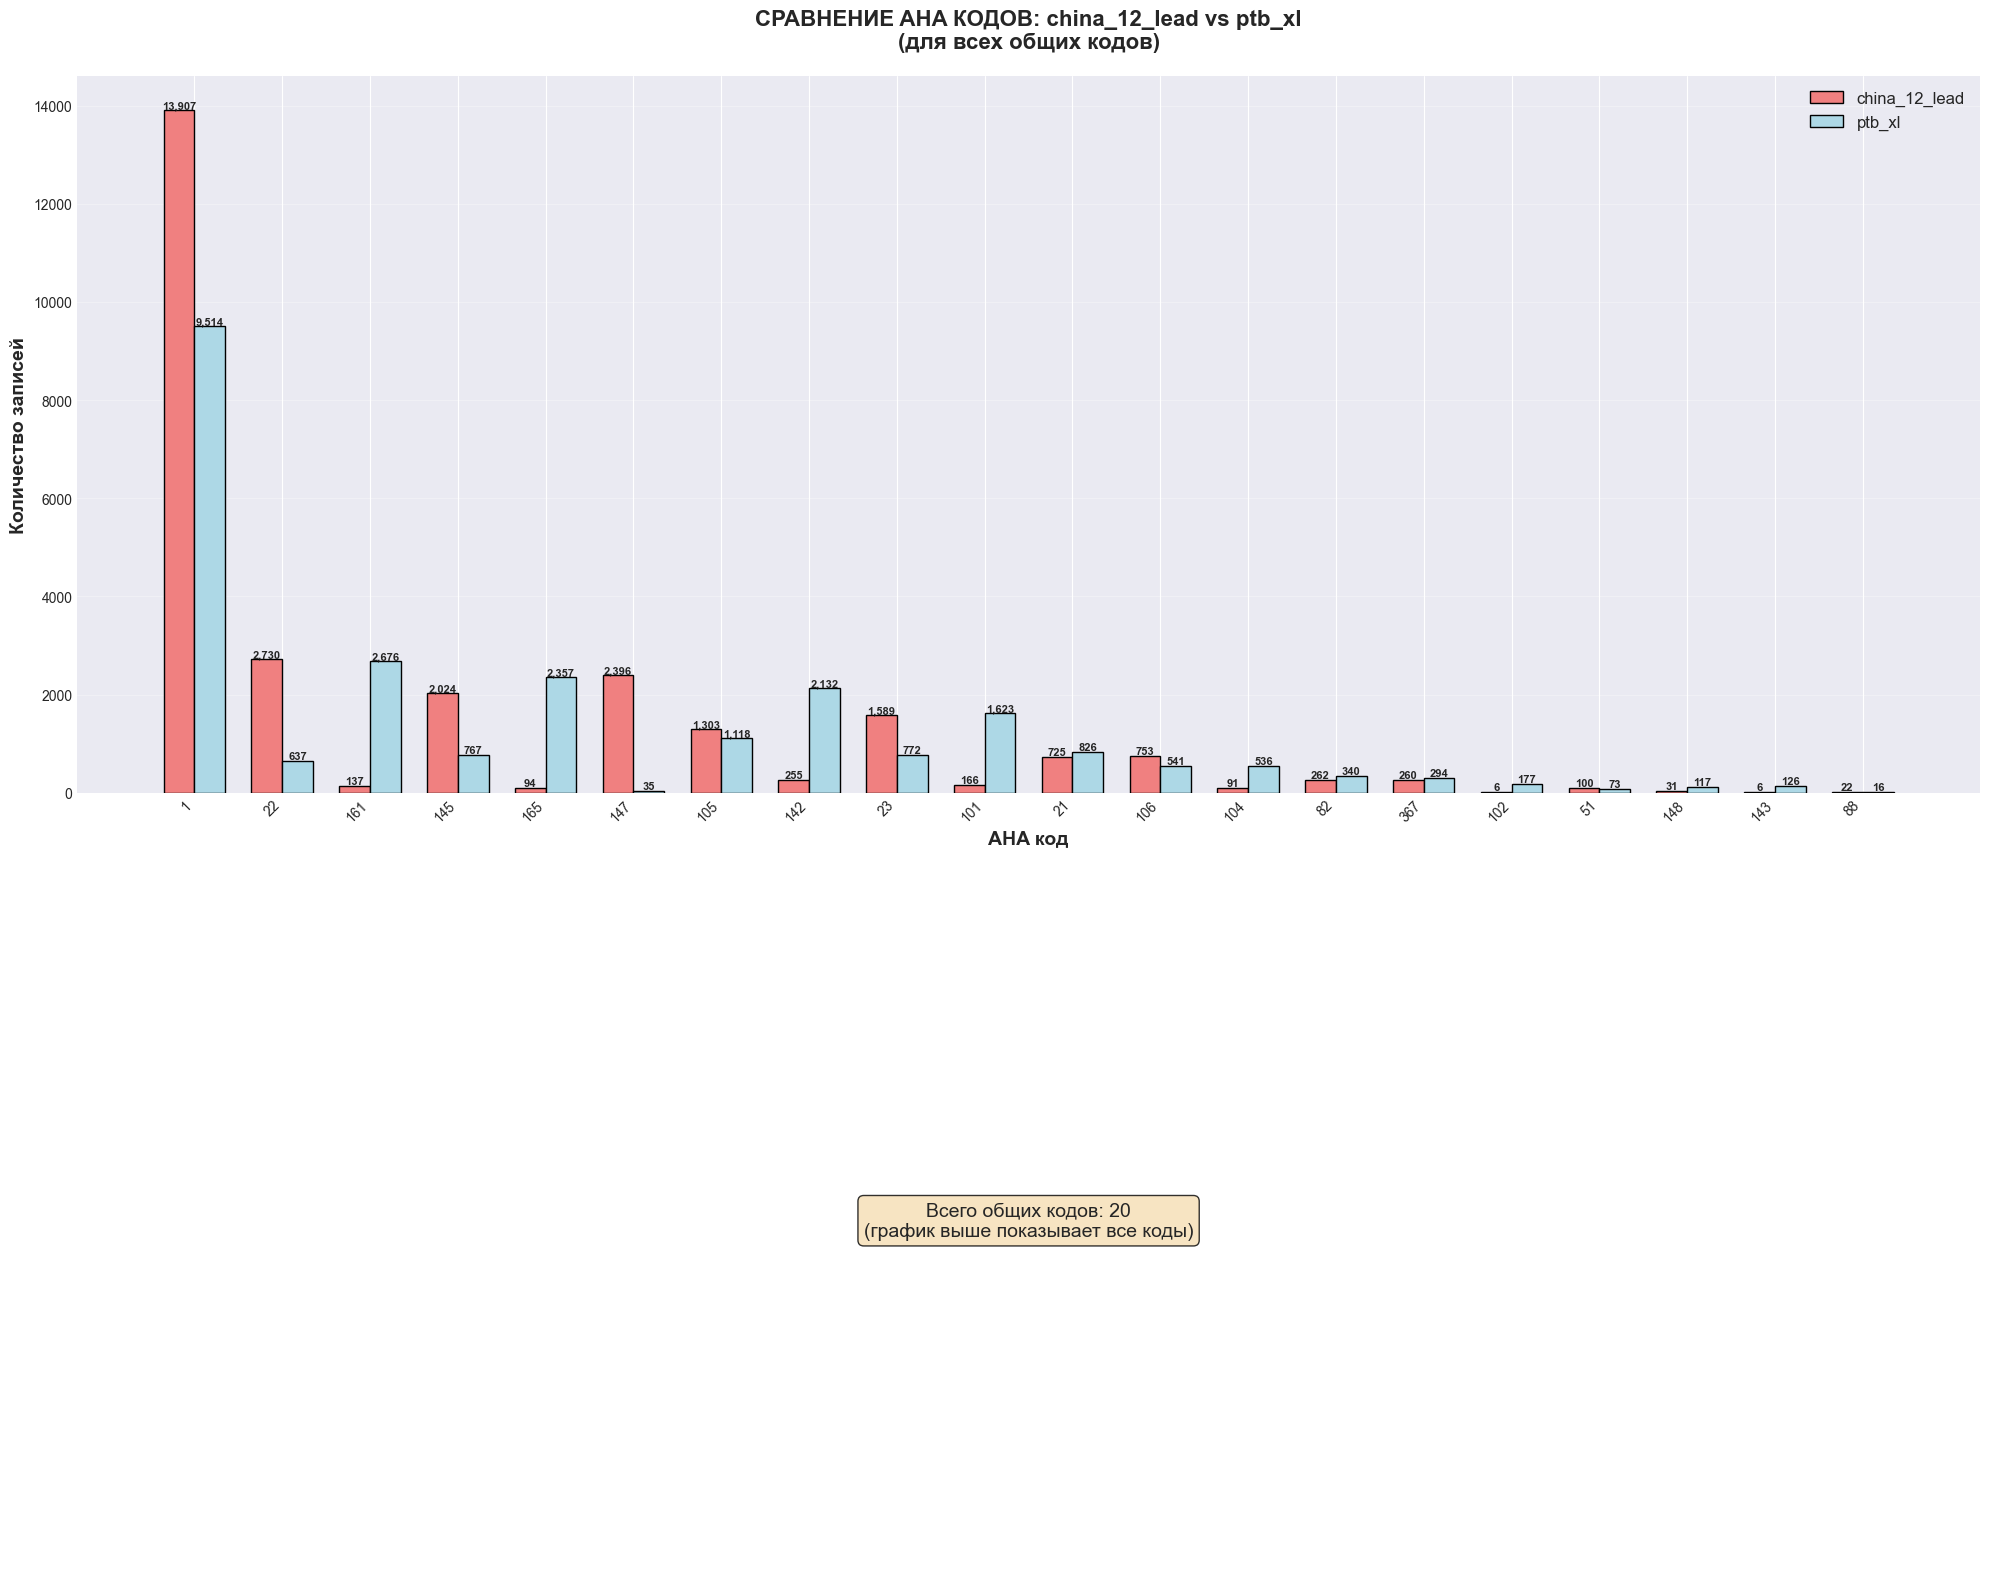


💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ СРАВНЕНИЯ В: d:\deep_ecg_2026\analysis_results\comparison
  1. Сохранение объединенных данных...
  2. Сохранение данных по пересечениям...
  3. Сохранение уникальных кодов...
  4. Сохранение отчета...

✅ Результаты сравнения сохранены в: d:\deep_ecg_2026\analysis_results\comparison
   • combined_aha_codes.csv - объединенные данные
   • intersection_aha_codes.csv - данные по пересечениям
   • intersection_codes_sorted.txt - общие коды (текст)
   • china_only_aha_codes.csv - коды только в china
   • ptb_only_aha_codes.csv - коды только в ptb
   • simple_comparison_report.txt - отчет

СРАВНИТЕЛЬНЫЙ АНАЛИЗ ЗАВЕРШЕН!

🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:
------------------------------------------------------------
1. Общих AHA кодов: 20
2. Записей с общими кодами:
   • В china_12_lead: 26,857 (76.8% от всех записей china)
   • В ptb_xl: 24,677 (49.9% от всех записей ptb)
3. Самый частый общий код: '1'
   • china: 13,907, ptb: 9,514
4. Коды только в china_12_lead: 39
5. Коды только в

In [8]:
main()